In [1]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# Display the first few rows of the training dataset
print(train_df.head())

# Get summary statistics and data types
print(train_df.info())
print(train_df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
# Check for missing values
print(train_df.isnull().sum())

# Fill missing values in 'Age' with median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Drop 'Cabin' column if it exists
if 'Cabin' in train_df.columns:
    train_df = train_df.drop(columns=['Cabin'])

# Convert 'Sex' column to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column
if 'Embarked' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Create a new feature 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Display the cleaned DataFrame
print(train_df.head())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  FamilySize  
0         A/5 21171   7.2500 

In [13]:
# Example: Create a new feature 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1


In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x800 with 0 Axes>

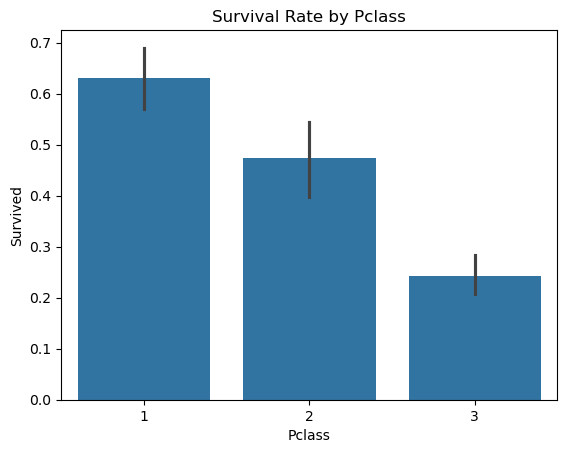

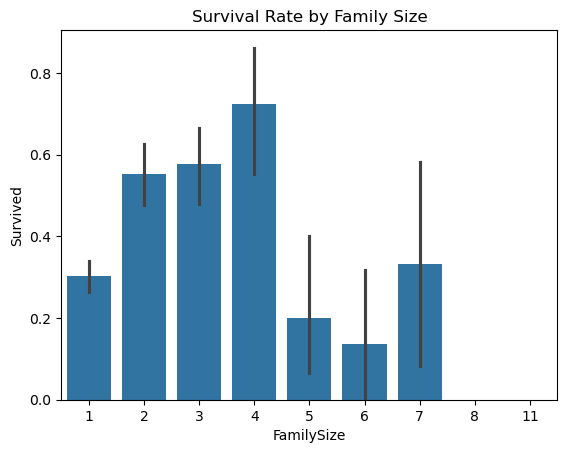

In [19]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()
